# Dataset Preprocessing

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from logistic_regression import LogisticRegression as LR
from sklearn.linear_model import LogisticRegression
from adaboost import AdaBoost
import preprocessing as pp
from mutual_classifier import SelectKBest as SKB, info_gain_score

### Importing the dataset
Change the path to the dataset to import different datasets below.

In [54]:
dataset = pd.read_csv('../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# dataset = pd.read_csv('../datasets/creditcard.csv')


### Understanding the dataset

In [55]:
print(f"Shape of dataset: {dataset.shape}")
# print(f"Information of each feature of the dataset: {dataset.info()}")
print(f"number of non number values in numeric features: {dataset.isna().sum()}")

Shape of dataset: (7043, 21)
number of non number values in numeric features: customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Understanding the dataset with graphs 
Plot different parameters against each other to understand the dataset.
Change the parameters to plot different graphs. `All parameters might not work as some values may not be numeric.`

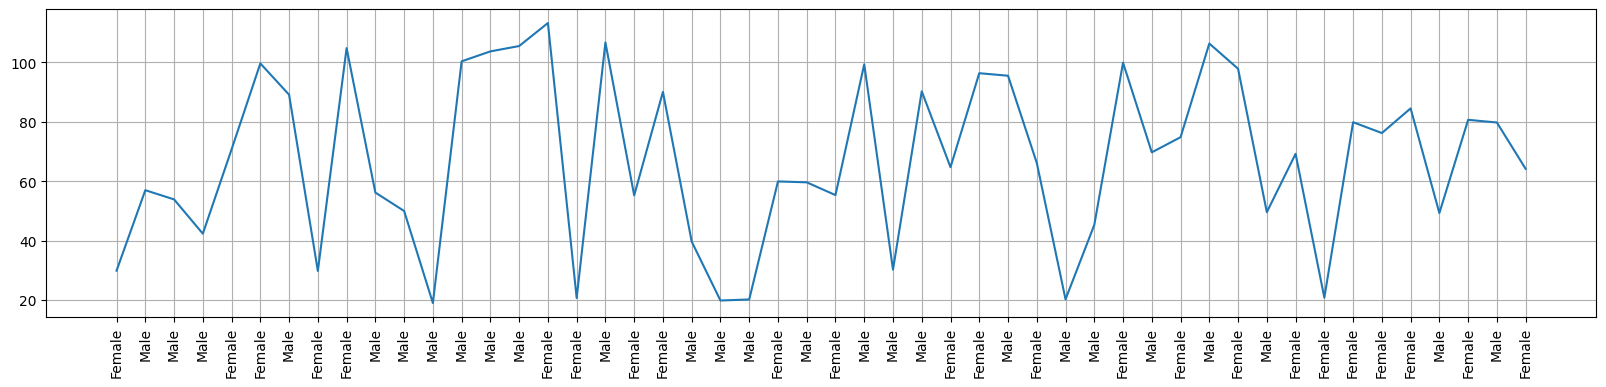

In [56]:
# plot the data
y_test = np.array(dataset.iloc[:50, 18])
x_test = list(range(50))
x_ticks = dataset.iloc[:50, 1]
plt.figure(figsize=(20, 4))
plt.xticks(x_test, x_ticks, rotation='vertical')
plt.grid(True)
plt.plot(x_test, y_test)
plt.show()

### Selecting independent and dependent variables
Change the values of `independent_columns` and `dependent_column` to select different independent and dependent variables.

In [57]:
# assuming first column to be unique identifier
# drop the first column
X = dataset[dataset.columns[1:-1]]

# assume last column to be the target column
y = dataset[dataset.columns[-1]]

### Missing values
Check if there are any missing values in the dataset. If there are any missing values, then there can be two ways to handle them:

1. Remove the rows with missing values. Use the following code to remove the rows with missing values:
    
    ```python
    dataset = dataset.dropna()
    ```

1. Replace the missing values with substituted values. (Imputation)

Here, we are replacing the missing numerical values with the mean of the column and the missing categorical values with the most frequent value of the column.

In [58]:
# # before preprocessing
# # print(f"Before preprocessing: {dataset.isnull().sum()}")

# # Identify numerical and categorical columns
# numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
# categorical_columns = dataset.select_dtypes(include=['object']).columns

# # Initialize SimpleImputer with strategy as 'mean'
# imputer = SimpleImputer(strategy='mean')

# # Fit and transform the numerical columns with the SimpleImputer
# dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# # For categorical columns, replace missing values with "UNKNOWN_" + column name
# for col in categorical_columns:
#     dataset[col].fillna(f"UNKNOWN_{col}", inplace=True)

# # after preprocessing
# # print(f"After preprocessing: {dataset.isnull().sum()}")

preprocessor = pp.Preprocessor(X)
dataset = preprocessor.fill_missing_values()

Categorical cells: ['MultipleLines', 'TotalCharges', 'Dependents', 'Contract', 'PaymentMethod', 'PhoneService', 'InternetService', 'OnlineBackup', 'gender', 'PaperlessBilling', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Partner', 'OnlineSecurity']


e:\Study_Materials\4_2\CSE472\Offlines\offline_2\solution\scripts\preprocessing.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data.replace(r'^\s*$', np.nan, regex=True, inplace=True)
e:\Study_Materials\4_2\CSE472\Offlines\offline_2\solution\scripts\preprocessing.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[self.numeric_features] = imputer.fit_transform(self.data[self.numeric_features])
e:\Study_Materials\4_2\CSE472\Offlines\offline_2\solution\scripts\preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy 

### Normalization
Normalize the numerical values in the dataset.

In [59]:
# # select numerical columns
# # numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
# # print(f"Numerical columns: {numerical_columns}")

# # # normalize the numerical columns
# # sc = StandardScaler()

# # # fit and transform the numerical columns
# # X[numerical_columns] = sc.fit_transform(X[numerical_columns])

# # Convert numpy array to DataFrame
# X_df = pd.DataFrame(X)

# # Convert non-numeric to numeric columns
# X_df_numeric = X_df.apply(pd.to_numeric, errors='ignore')

# # Select numerical columns
# numerical_columns = X_df_numeric.select_dtypes(include=['int64', 'float64']).columns

# # Initialize the StandardScaler
# sc = StandardScaler()

# # Fit and transform the numerical columns
# X_df_numeric[numerical_columns] = sc.fit_transform(X_df_numeric[numerical_columns])

# # replace the numerical columns in X_df with the scaled numerical columns
# X_df[numerical_columns] = X_df_numeric[numerical_columns]

# # Convert DataFrame back to numpy array
# X = X_df.values

X = preprocessor.normalize()

### Check for categorical values
Check for categorical values and convert them to numeric values. Use dummy variables. Dummy variables are dicrete variables taking values of either `0` or `1`. They are often called ‘On or Off’ variables or indicator variables. They just take 0 or 1 to indicate the presence of a categorical effect.

Instead of having one column and assigning a numerical value which might cause bias, we create different columns based on the type of categories present.

`Number of Columns = Types of Categories`

In [60]:
# # convert categorical data to numerical data (only non numeric data) using OneHotEncoder

# # one_hot_encoder = OneHotEncoder(categories='auto')
# # X = one_hot_encoder.fit_transform(X).toarray()

# # # show info of X
# # pd.DataFrame(X).info()

# X = pd.DataFrame(X)
# non_numeric_columns = X.select_dtypes(include=['object']).columns
# one_hot_encoder = OneHotEncoder()
# encoded = one_hot_encoder.fit_transform(X[non_numeric_columns])
# X = pd.DataFrame(X).drop(non_numeric_columns, axis=1)
# X = pd.concat([X, pd.DataFrame(encoded.toarray())], axis=1)

# print(X.info())

# X = X.iloc[:, :].values

# # convert categorical y to numerical y
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
X = preprocessor.encode_categorical_features()
y = LabelEncoder().fit_transform(y)

### Splitting the dataset into training and test set

In [61]:
X = X.iloc[:, :].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Tweaks For Weak Learning

### Feature Selection

In [62]:
k = 20 # number of features to select
k = min(k, len(X_train[0]))

# best_features = SelectKBest(score_func=mutual_info_classif, k=int(k))
best_features = SKB(score_func=info_gain_score, k=int(k))

# Train set feature selection
fit = best_features.fit(X_train, Y_train)
X_train = fit.transform(X_train)

# Test set feature selection
X_test = fit.transform(X_test)

# print(pd.DataFrame(X_train).info())
# print(pd.DataFrame(X_test).info())

### Training the model

In [63]:
# model = LR(alpha=0.1, error_threshold=0.0001)
# model = LogisticRegression()
# model.fit(X_train, Y_train)
# model.fit(X_train, Y_train)
# model = AdaBoost(LogisticRegression)
model = AdaBoost(LR)
model.fit(X_train, Y_train, 10)

### Predicting the test set results

In [64]:
y_pred = model.predict(X_test)
print(y_pred)
# convert -1 to 0
# y_pred = np.where(y_pred == -1, 0, y_pred)
# print(pd.DataFrame(y_pred))
# print(pd.DataFrame(Y_test))

[0. 0. 1. ... 0. 0. 1.]


In [65]:
print("Test set results:")
print(f"Accuracy score: {accuracy_score(Y_test, y_pred)}")
print(f"Recall score: {recall_score(Y_test, y_pred)}")
print(f"Precision score: {precision_score(Y_test, y_pred)}")
print(f"F1 score: {f1_score(Y_test, y_pred)}")

print("----------------------------------------")
print("Train set results:")
Y_train_pred = model.predict(X_train)
print(f"Accuracy score: {accuracy_score(Y_train, Y_train_pred)}")
print(f"Recall score: {recall_score(Y_train, Y_train_pred)}")
print(f"Precision score: {precision_score(Y_train, Y_train_pred)}")
print(f"F1 score: {f1_score(Y_train, Y_train_pred)}")

Test set results:
Accuracy score: 0.7806955287437899
Recall score: 0.6141304347826086
Precision score: 0.5750636132315522
F1 score: 0.5939553219448095
----------------------------------------
Train set results:
Accuracy score: 0.7900248491302805
Recall score: 0.6389073950699533
Precision score: 0.599375
F1 score: 0.618510158013544
